# Sina Mahbobi

#### Exploring different ML Algorithms on Breast Cancer Dataset, and comparing results to Q-Learning

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
diagnosis_file_path = "../data/wdbc.data"

var_set = [
    "ID_Number",
    "Diagnosis",
    "radius mean",
    "texture mean",
    "perimeter mean",
    "area mean",
    "smoothness mean" ,
    "compactness mean" ,
    "concavity mean",
    "concave points mean" ,
    "symmetry mean" ,
    "fractal dimension mean",
    "radius SE",
    "texture SE",
    "perimeter SE",
    "area SE",
    "smoothness SE" ,
    "compactness SE" ,
    "concavity SE",
    "concave points SE" ,
    "symmetry SE" ,
    "fractal dimension SE",
    "radius worst",
    "texture worst",
    "perimeter worst",
    "area worst",
    "smoothness worst" ,
    "compactness worst" ,
    "concavity worst",
    "concave points worst" ,
    "symmetry worst" ,
    "fractal dimension worst",

    
]


df = pd.read_csv(diagnosis_file_path, names = var_set)

##### Formatting Dataframe and Reading in File

In [3]:
df

,ID_Number,Diagnosis,radius mean,texture mean,perimeter mean,area mean,smoothness mean,compactness mean,concavity mean,concave points mean,...,radius worst,texture worst,perimeter worst,area worst,smoothness worst,compactness worst,concavity worst,concave points worst,symmetry worst,fractal dimension worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
x = df.iloc[:,2:32]
y = df.iloc[:,1]

'''
Categorical Encoding of Dependent Variable
M = 1
B = 0
'''
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(y)


#Feature Scaling X
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)

In [5]:
# Splitting X and Y into training and test set 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)



##### Running a Variety of Algorithms on Dataset

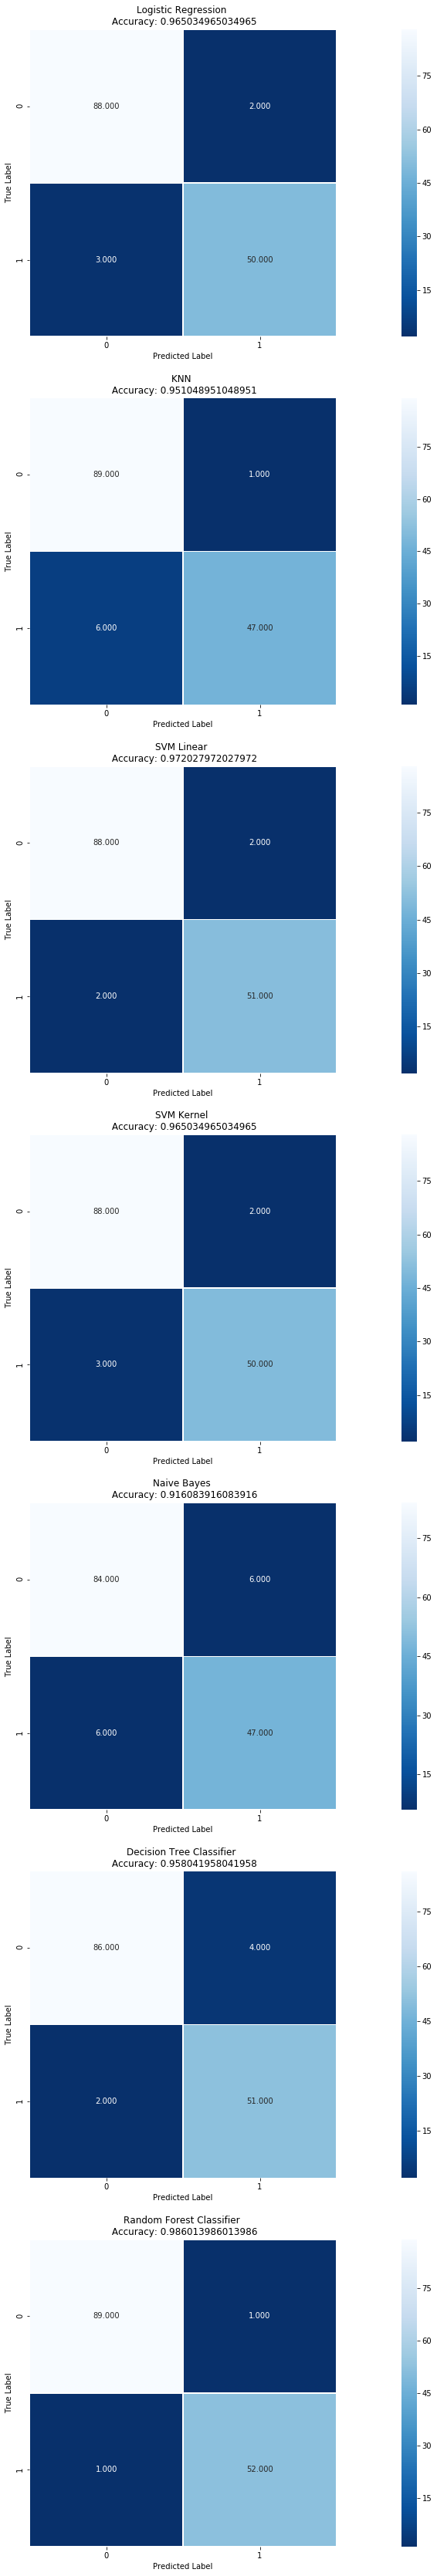

In [32]:
#import confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


classifiers = {
    "Logistic Regression": LogisticRegression(random_state = 0),
    "KNN": KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2),
    "SVM Linear": SVC(kernel = 'linear', random_state = 0),
    "SVM Kernel": SVC(kernel = 'rbf', random_state = 0),
    "Naive Bayes": GaussianNB(),
    "Decision Tree Classifier": DecisionTreeClassifier(criterion = 'entropy', random_state = 0),
    "Random Forest Classifier" : RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
}

fig, ax =plt.subplots(7,1, figsize=(30, 60))

for i, (key, classifier) in enumerate(classifiers.items()): 
    Y_pred = classifier.fit(X_train, Y_train).predict(X_test)
    cm = confusion_matrix(Y_test, Y_pred)
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', ax = ax[i]);
    ax[i].set(xlabel="Predicted Label", ylabel="True Label", title = '{0} \n Accuracy: {1}'.format(key, accuracy_score(Y_test, Y_pred)))
plt.show()

